<a href="https://colab.research.google.com/github/Reptilefury/coursera-machine-learning/blob/main/Differentiantion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import torch
from torch import nn
from torch.utils.data import  DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt 

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
#Load the dataset
train_data = datasets.FashionMNIST(
    root = "data",
    download = "True",
    train = True,
    transform = ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10,dtype=torch.float).scatter_(0,torch.tensor(y),value=1))
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
test_data = datasets.FashionMNIST(
    root = "data",
    download= True,
    train = False,
    transform = ToTensor(),
    target_transform = Lambda(lambda y: torch.zeros(10,dtype=torch.float).scatter_(0, torch.tensor(y), value=1 ))
)

In [5]:
class_names = ["T-Shirt", "Trouser","Pullover","Dress", "Coat", "Sandal","Shirt","Sneaker","Bag","Ankle Boot",]

In [6]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

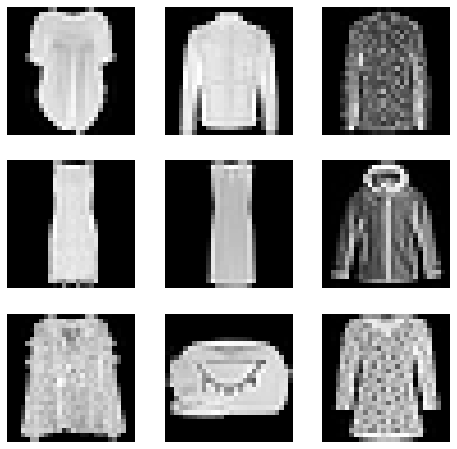

In [7]:
#Visualizing the dataset
figure = plt.figure(figsize=(8,8))
cols,rows = 3,3
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(train_data), size=(1,)).item()
  image, labels = train_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.axis('off')
  plt.imshow(image.squeeze(),cmap='gray')


In [8]:
#Build the network by defining a class which inherits/subclasses the torch.nn Module
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork,self).__init__()
    self.flatten = nn.Flatten()
    self.relu_layers_stack = nn.Sequential(
        nn.Linear(28 * 28 , 512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10)
    )
  def forward(self,x):
    x = self.flatten(x)
    logits = self.relu_layers_stack(x)
    return logits

In [9]:
#we create an instance of our model and pass it to the GPU 
model = NeuralNetwork().to(device)

In [10]:
x = torch.rand(1, 28,28 , device= device) #We create a random tensor i.e tensor of random values 
logits = model(x)
pred_prob = torch.softmax(logits,dim=1)
y_prob = pred_prob.argmax(1) #maximumlikelihood 

**Backpropagation**
When training neural networks the most frequently used algorithm is Backpropagation (gradient descent to be specific). This algorithm adjusts the model's parameters(weights) based of the gradient of the loss function with respect to the specific weight parameter. The loss function calculates the difference between the desired output or target value and the model's predicted output. The main goal of the backpropagation algorithm is to get the loss function value closer to zero as possible. The algorithm is called backpropagation because it traverses backwards through the network to adjust the weight parameters so as to minimise the loss function. This is the training or so called learning of our model. The process of forward and backward pass to reduces the loss closer to 0  is called backpropagation.

In [11]:
#We create a tensor of rank 1  which has 5 elements and values of one 
x = torch.ones(5)
y = torch.zeros(3)
#We randomly initialize our weights(random values) with a rank 5 and 3 elements 
w = torch.randn(5,3,requires_grad=True)
#Same goes for bias except that it has a rank of 5 with one value in each tensor this value will be applied to our linear function
b = torch.randn(3,requires_grad=True) #Requires_grad tells pytorch  that gradient descent should be performed on this parameter
z = torch.matmul(x,w) + b  #We do the matrix multiplication of our weights and the inputs then add a bias
#We then define a loss function 
loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y) #We define a loss function we pass in the predictions and the target

In the single layer network w and b are the model's parameters that we need to optimize thus we compute the gradient of the loss with respect to these parameters.Thus we use the requires_grad property. A function that we can apply to tensors to construct a computational graph is infact an object of class function.This object knows how to compute the function in the foward direction and also its derivative during the backpropagation step. A reference to backward propagation function is stored in grad_fn property of a tensor

In [12]:
z.grad_fn

In [13]:
loss.grad_fn

In order to optimize the parameters in our neural network we need to calculate the derivative of the loss with respect to specific parameters i.e dloss/w and dloss/b

In [14]:
#To compute the derivative we call the .backward() method on the loss 
loss.backward()

In [15]:
w.grad

tensor([[0.0027, 0.0482, 0.3278],
        [0.0027, 0.0482, 0.3278],
        [0.0027, 0.0482, 0.3278],
        [0.0027, 0.0482, 0.3278],
        [0.0027, 0.0482, 0.3278]])

In [16]:
b.grad

tensor([0.0027, 0.0482, 0.3278])

In [17]:
#We can only call the grad method on tensors/leaf nodes that have their requires_grad property set to true 
#require_grad  means that the parameter is learnable 
#We can only calculate gradients using backward once on a given graph  this is because of performance reasons 
#If we need to do several backward calls on the same graph  we need to pass Retain_graph = True to the backward call 

By default all tensors with requires_grad = True are tracking the computational history and support gradient computation. However there some cases where we do not need to do this , this is the case where we have trained the model and we want to pass in some input data i.e this is when we do a forward pass or forward computations through the network. We can stop tracking computations by using torch.no_grad() method.

In [18]:
#Disabling Tracking method

In [19]:
w

tensor([[ 0.7725, -0.7847,  1.2390],
        [-0.4097,  0.4283,  1.6054],
        [-0.8021, -0.4958,  0.3607],
        [-2.3885, -1.2015,  0.8141],
        [-1.4251,  1.6621, -0.7040]], requires_grad=True)

In [20]:
w

tensor([[ 0.7725, -0.7847,  1.2390],
        [-0.4097,  0.4283,  1.6054],
        [-0.8021, -0.4958,  0.3607],
        [-2.3885, -1.2015,  0.8141],
        [-1.4251,  1.6621, -0.7040]], requires_grad=True)

In [21]:
import torch
from torch import nn
from torchvision import datasets
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision.transforms import Lambda,ToTensor
import matplotlib.pyplot as plt

In [22]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [23]:
train_data = datasets.FashionMNIST(
    root = "data",
    download =True,
    train = True, 
    transform = ToTensor(),
    target_transform= Lambda(lambda y:torch.zeros(10,dtype=torch.float).scatter_(0, torch.tensor(y),value=1))
    )

In [24]:
test_data = datasets.FashionMNIST(
    root="data",
    download=True,
    train=False,
    transform=ToTensor(),
    target_transform =Lambda(lambda y:torch.zeros(10,dtype=torch.float).scatter_(0,torch.tensor(y),value=1))     
)

In [25]:
class_names = ["T-SHirt", "Trouser","Pull-Over", "Dress","Coat", "Sandal","Shirt","Sneaker", "Bag","Ankle Boot"]

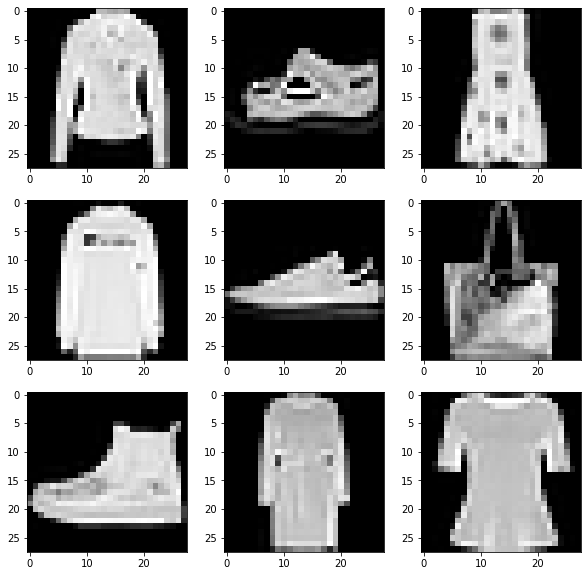

In [26]:
#Visualize the dataset before building the computational graph
figure = plt.figure(figsize=(10,10))
cols,rows
for i in range(1,rows * cols + 1):
  sample_idx = torch.randint(len(train_data),size=(1,)).item()  
  images,labels = train_data[sample_idx]
  figure.add_subplot(rows,cols,i) 
  plt.imshow(images.squeeze(), cmap='gray')
 # plt.title(class_names[labels])
#  plt.title(labels_map[labels])

In [27]:
#Build the computational graph
class NeuralNetwork(nn.Module):
  def __init__(self):
      super(NeuralNetwork, self).__init__()
      self.flatten = nn.Flatten()
      self.layers_relu_stack = nn.Sequential(
          nn.Linear(28 * 28,512),
          nn.ReLU(),
          nn.Linear(512,512),
          nn.ReLU(),
          nn.Linear(512,10))
  def forward(self,x):
    x = self.flatten(x)
    logits = self.layers_relu_stack(x)
    return logits

In [28]:
#Create an instance of the model
model = NeuralNetwork().to(device) #Create an instance of the model and pass it to the GPU if it is available

In [29]:
x = torch.rand(1,28*28, device = device) 
logits = model(x)
pred_prob = nn.Softmax(dim=1)(logits)
y_pred = pred_prob.argmax(1)

In [30]:
#Automatic differentiation


Let's build a single layer neural network to perform automatic differentiation with Pytorch.

In [35]:
#Inputs
x = torch.ones(5)
y = torch.zeros(3)
w = torch.randn(5,3,requires_grad = True)
b  = torch.randn(3,requires_grad=True)
#Predictions 
z = torch.matmul(x,w) + b 
loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y)

In [36]:
#To apply backpropagation we call the .backward method on the loss  
loss.backward()

In [39]:
print(w.grad) #Updated weights

tensor([[0.0105, 0.3313, 0.1759],
        [0.0105, 0.3313, 0.1759],
        [0.0105, 0.3313, 0.1759],
        [0.0105, 0.3313, 0.1759],
        [0.0105, 0.3313, 0.1759]])


In [40]:
print(b.grad) #updated bias parameters

tensor([0.0105, 0.3313, 0.1759])


In [38]:
print(b.grad_fn)

None


In [41]:
w.requires_grad #Here we can see that backpropagation can affect the weights

True

In [42]:
b.requires_grad #Here we can see that backpropagation can affect the bias 

True

In [44]:
#To disable the gradient calculation of our parameters we can use the 
with torch.no_grad():
  z = torch.matmul(x,w)
  print(z.requires_grad)

False


In [46]:
#We can also use the detach method to disable gradient tracking
z = torch.matmul(x,w) + b
z_detach = z.detach()

In [47]:
z_detach.requires_grad #Gradient tracking has been disabled 

False

Gradient tracking becomes useful in cases where we only want to perform forward computations on our graph.This is only making predictions , especially when we want to see how our model is performing.

A new graph is recreated with each .backward() call that's why we are able to use control flow statements after an iteration 

Pytorch graphs are dynamic as opposed to tensorflow's static graphs